In [ ]:
%pip install scikit-learn

In [6]:
from preprocessing.data_loader import DataLoader
from preprocessing.data_processor import DataProcessor 
from PCA.PCA import imlPCA

In [7]:
# Initialize PCA
pca = imlPCA()

## --- Step 1 --- ##
# Initialize DataLoader and DataProcessor
data_loader    = DataLoader()
data_processor = DataProcessor()

# Load Datasets
df_satimage, labels_satimage = data_loader.load_arff_data('satimage')
df_splice,   labels_splice   = data_loader.load_arff_data('splice')

# Preprocess Datasets
df_satimage = data_processor.preprocess_dataset(df_satimage)
df_splice   = data_processor.preprocess_dataset(df_splice)


--- Step 2: Plotting Original Satimage Dataset ---


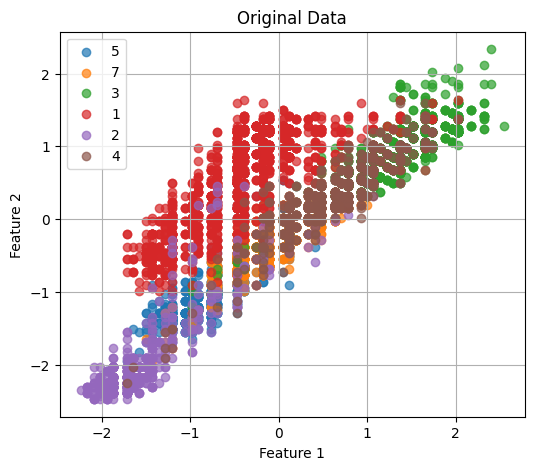

In [8]:
## --- Step 2: Plot Original Datasets --- ##
print("\n--- Step 2: Plotting Original Satimage Dataset ---")
X_satimage = df_satimage.values
pca.plot_original_dataset(X_satimage, labels_satimage, feature_indices=[0, 1])


--- Step 2: Plotting Original Splice Dataset ---


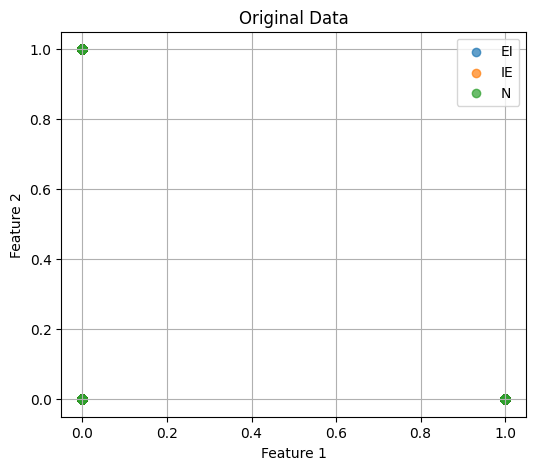

In [9]:
print("\n--- Step 2: Plotting Original Splice Dataset ---")
X_splice = df_splice.values
pca.plot_original_dataset(X_splice, labels_splice, feature_indices=[0, 1])

In [10]:
## --- Step 3: Compute Mean Vectors --- ##
print("\n--- Step 3: Computing Mean Vectors ---")
mean_vec_satimage = pca.compute_mean_vector(df_satimage)
mean_vec_splice   = pca.compute_mean_vector(df_splice)


--- Step 3: Computing Mean Vectors ---


In [11]:
## --- Step 4: Compute Covariance Matrices --- ##
print("\n--- Step 4: Computing Covariance Matrices ---")
cov_matrix_satimage = pca.compute_covariance_matrix(df_satimage, mean_vec_satimage)
print("Satimage Covariance Matrix:\n", cov_matrix_satimage)


--- Step 4: Computing Covariance Matrices ---
Satimage Covariance Matrix:
            a1        a2        a3        a4        a5        a6        a7  \
a1   1.000155  0.810567  0.213053 -0.167920  0.953000  0.773532  0.188593   
a2   0.810567  1.000155  0.360032 -0.103695  0.788122  0.959268  0.337838   
a3   0.213053  0.360032  1.000155  0.865037  0.206893  0.345793  0.934897   
a4  -0.167920 -0.103695  0.865037  1.000155 -0.166416 -0.102823  0.832845   
a5   0.953000  0.788122  0.206893 -0.166416  1.000155  0.810715  0.211981   
a6   0.773532  0.959268  0.345793 -0.102823  0.810715  1.000155  0.359009   
a7   0.188593  0.337838  0.934897  0.832845  0.211981  0.359009  1.000155   
a8  -0.175479 -0.108730  0.818620  0.945998 -0.170483 -0.105540  0.864527   
a9   0.883033  0.726050  0.177535 -0.168833  0.952563  0.787285  0.202572   
a10  0.709878  0.887366  0.311348 -0.104972  0.774899  0.959016  0.342734   
a11  0.156983  0.299405  0.847605  0.761234  0.186871  0.332663  0.934869   


In [12]:
cov_matrix_splice = pca.compute_covariance_matrix(df_splice, mean_vec_splice)
print("\nSplice Covariance Matrix:\n", cov_matrix_splice)


Splice Covariance Matrix:
                 attribute_1_A  attribute_1_C  attribute_1_D  attribute_1_G  \
attribute_1_A        0.179232      -0.060782  -7.782549e-05      -0.064050   
attribute_1_C       -0.060782       0.192375  -8.646047e-05      -0.071157   
attribute_1_D       -0.000078      -0.000086   3.326680e-04      -0.000091   
attribute_1_G       -0.064050      -0.071157  -9.111007e-05       0.198893   
attribute_1_T       -0.054322      -0.060349  -7.727197e-05      -0.063595   
...                       ...            ...            ...            ...   
attribute_60_A       0.006979      -0.004550  -7.527928e-05      -0.001389   
attribute_60_C      -0.003461       0.006369  -8.302862e-05      -0.005437   
attribute_60_G      -0.003850       0.004534  -9.730954e-05       0.003109   
attribute_60_N      -0.000078       0.000246  -1.107048e-07      -0.000091   
attribute_60_T       0.000409      -0.006599   2.557281e-04       0.003809   

                attribute_1_T  attr

In [13]:
## --- Step 5: Calculate Eigenvectors --- ##
print("\n--- Step 5: Calculating Eigenvectors and Eigenvalues ---")
eigenvalues_satimage, eigenvectors_satimage = pca.eigen_decomposition(cov_matrix_satimage)
print("Satimage Eigenvalues:\n", eigenvalues_satimage)
print("\nSatimage Eigenvectors:\n", eigenvectors_satimage)


--- Step 5: Calculating Eigenvectors and Eigenvalues ---
Satimage Eigenvalues:
 [1.63303797e+01 1.43585776e+01 1.57743796e+00 8.89540494e-01
 6.59545271e-01 6.09161393e-01 3.70642915e-01 1.92014896e-01
 1.29813391e-01 1.25962268e-01 8.38954659e-02 6.66241678e-02
 6.45174830e-02 5.72302532e-02 4.55841102e-02 4.42423485e-02
 4.08065150e-02 3.67868135e-02 2.89738610e-02 2.77551006e-02
 8.45101334e-03 2.62044470e-02 2.48063773e-02 1.00651622e-02
 1.08275731e-02 1.21264353e-02 1.28529670e-02 2.22561054e-02
 1.44999698e-02 1.49416571e-02 1.53965267e-02 2.05525759e-02
 1.72888471e-02 1.79881570e-02 1.86588687e-02 1.91866193e-02]

Satimage Eigenvectors:
 [[-0.17434753 -0.14557825 -0.23289601 ... -0.08672155 -0.123084
   0.01898267]
 [-0.19462238 -0.119447    0.21701231 ...  0.22189295  0.0716923
  -0.06019561]
 [-0.17592876  0.15144168  0.04278519 ... -0.24810375  0.01730345
   0.09466057]
 ...
 [-0.19479848 -0.11920895  0.21551991 ... -0.17348011 -0.03489286
  -0.15507525]
 [-0.17425734  0.1

In [14]:
eigenvalues_splice, eigenvectors_splice = pca.eigen_decomposition(cov_matrix_splice)
print("\n\nSplice Eigenvalues:\n", eigenvalues_splice)
print("\nSplice Eigenvectors:\n", eigenvectors_splice)



Splice Eigenvalues:
 [ 1.02402040e+00+0.00000000e+00j  9.04840529e-01+0.00000000e+00j
  7.07569723e-01+0.00000000e+00j  5.62461150e-01+0.00000000e+00j
  4.99791318e-01+0.00000000e+00j  4.58920223e-01+0.00000000e+00j
  4.39586104e-01+0.00000000e+00j  4.26286878e-01+0.00000000e+00j
  4.21303167e-01+0.00000000e+00j  4.13248298e-01+0.00000000e+00j
  4.07761889e-01+0.00000000e+00j  8.86815182e-04+0.00000000e+00j
  4.00263716e-01+0.00000000e+00j  3.98189191e-01+0.00000000e+00j
  3.90838734e-01+0.00000000e+00j  3.89604635e-01+0.00000000e+00j
  3.84945353e-01+0.00000000e+00j  3.78714367e-01+0.00000000e+00j
  3.76616179e-01+0.00000000e+00j  3.73232831e-01+0.00000000e+00j
  3.68395070e-01+0.00000000e+00j  3.63955241e-01+0.00000000e+00j
  3.63420159e-01+0.00000000e+00j  3.59927722e-01+0.00000000e+00j
  3.56561458e-01+0.00000000e+00j  3.52231206e-01+0.00000000e+00j
  3.50813183e-01+0.00000000e+00j  3.09734398e-01+0.00000000e+00j
  3.46814373e-01+0.00000000e+00j  3.44162061e-01+0.00000000e+00j
  

In [15]:
## --- Step 6: Sort Eigenvectors --- ##
print("\n--- Step 6: Sorting Eigenvectors ---")
k = 2

sorted_eigenvalues_satimage, sorted_eigenvectors_satimage = pca.sort_eigens(eigenvalues_satimage, eigenvectors_satimage, k)
print(f"Top {k} Satimage Sorted Eigenvalues:\n", sorted_eigenvalues_satimage)
print(f"\nTop {k} Satimage Sorted Eigenvectors:\n", sorted_eigenvectors_satimage)


--- Step 6: Sorting Eigenvectors ---
Top 2 Satimage Sorted Eigenvalues:
 [16.33037965 14.35857761]

Top 2 Satimage Sorted Eigenvectors:
 [[-0.17434753 -0.14557825]
 [-0.19462238 -0.119447  ]
 [-0.17592876  0.15144168]
 [-0.09327331  0.22121057]
 [-0.1788039  -0.14618189]
 [-0.19764212 -0.11918481]
 [-0.18003584  0.1561375 ]
 [-0.09584164  0.22526255]
 [-0.17468743 -0.1431231 ]
 [-0.19210632 -0.11563005]
 [-0.17457342  0.15502689]
 [-0.09242842  0.22011197]
 [-0.17835805 -0.14723135]
 [-0.1994932  -0.12238374]
 [-0.18273356  0.15677398]
 [-0.09785839  0.22903303]
 [-0.1839534  -0.1492258 ]
 [-0.2039569  -0.12320002]
 [-0.18635947  0.16268066]
 [-0.09960562  0.2345787 ]
 [-0.17996417 -0.14709787]
 [-0.19880848 -0.1205187 ]
 [-0.1800669   0.16110554]
 [-0.09540891  0.22924801]
 [-0.1711443  -0.14327696]
 [-0.19313471 -0.11845217]
 [-0.1757524   0.15234701]
 [-0.09334113  0.22137035]
 [-0.17688483 -0.14577933]
 [-0.19821359 -0.12050242]
 [-0.17937667  0.15695787]
 [-0.09511185  0.22688647

In [16]:
sorted_eigenvalues_splice, sorted_eigenvectors_splice = pca.sort_eigens(eigenvalues_splice, eigenvectors_splice, k)
print(f"\n\nTop {k} Splice Sorted Eigenvalues:\n", sorted_eigenvalues_splice)
print(f"\nTop {k} Splice Sorted Eigenvectors:\n", sorted_eigenvectors_splice)



Top 2 Splice Sorted Eigenvalues:
 [1.0240204 +0.j 0.90484053+0.j]

Top 2 Splice Sorted Eigenvectors:
 [[-5.68602681e-02+0.j -9.24459328e-03+0.j]
 [ 6.14532295e-02+0.j  2.66908236e-02+0.j]
 [ 2.79391898e-04+0.j -7.78301092e-05+0.j]
 [ 2.14959038e-02+0.j -4.66015209e-02+0.j]
 [-2.63682571e-02+0.j  2.92331207e-02+0.j]
 [-8.74149776e-02+0.j  8.86366138e-04+0.j]
 [ 8.49003172e-02+0.j  8.91144557e-03+0.j]
 [ 1.39384244e-04+0.j -4.20868408e-04+0.j]
 [ 4.94603189e-02+0.j -5.30371009e-02+0.j]
 [-4.70850428e-02+0.j  4.36601576e-02+0.j]
 [-6.58392045e-02+0.j -1.17628541e-02+0.j]
 [ 5.81523463e-02+0.j  9.74381705e-03+0.j]
 [ 5.20958096e-02+0.j -3.78622558e-02+0.j]
 [-4.44089514e-02+0.j  3.98812928e-02+0.j]
 [-5.65693872e-02+0.j -1.94882107e-02+0.j]
 [ 7.87610851e-02+0.j  3.85648729e-02+0.j]
 [ 2.30548162e-02+0.j -6.90280826e-02+0.j]
 [-4.52465141e-02+0.j  4.99514204e-02+0.j]
 [-7.24822240e-02+0.j -3.11484223e-02+0.j]
 [ 9.29756276e-02+0.j  4.34688212e-02+0.j]
 [ 1.53943877e-02+0.j -6.00164086e-0

In [17]:
## --- Step 7: Derive New Datasets --- ##
print("\n--- Step 7: Projecting Data onto New Subspace ---")
projected_satimage = pca.project_data(df_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)
projected_splice   = pca.project_data(df_splice,   mean_vec_splice, sorted_eigenvectors_splice)


--- Step 7: Projecting Data onto New Subspace ---



--- Step 8: Plotting PCA Subspace for Satimage ---


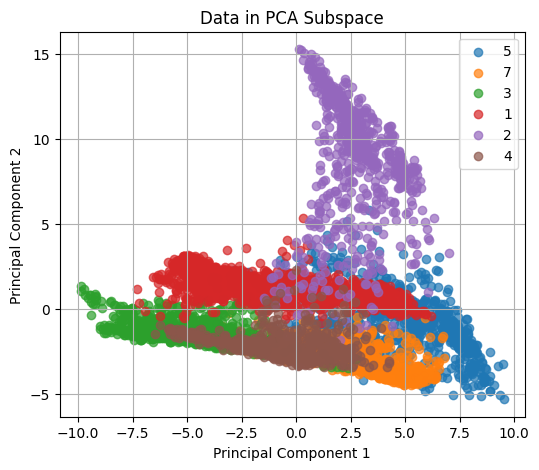

In [18]:
## --- Step 8: Plot New Subspaces --- ##
print("\n--- Step 8: Plotting PCA Subspace for Satimage ---")
X_projected_satimage = projected_satimage.values
pca.plot_pca_subspace(X_projected_satimage, labels_satimage)


--- Step 8: Plotting PCA Subspace for Splice ---


C:\Users\joanc\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\joanc\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


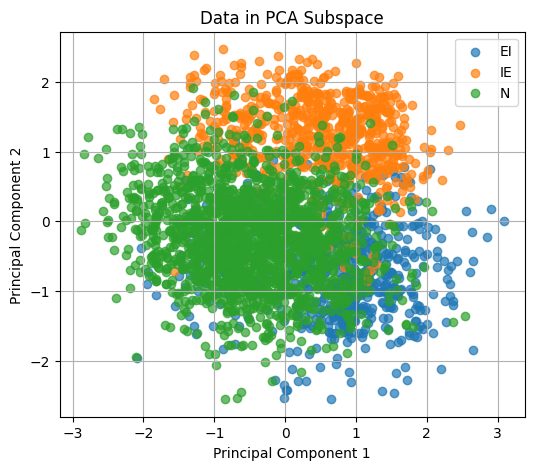

In [19]:
print("\n--- Step 8: Plotting PCA Subspace for Splice ---")
X_projected_splice = projected_splice.values
pca.plot_pca_subspace(X_projected_splice, labels_splice)

In [20]:
## --- Step 9: Reconstruct and Plot Datasets --- ##
print("\n--- Step 9: Reconstructing Data from PCA Subspace ---")
reconstructed_satimage = pca.reconstruct_data(projected_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)
reconstructed_splice   = pca.reconstruct_data(projected_splice,   mean_vec_splice,   sorted_eigenvectors_splice)


--- Step 9: Reconstructing Data from PCA Subspace ---


In [ ]:

# Plot Reconstructed Data vs Original Data for comparison
#print("\n--- Plotting Reconstructed vs Original Satimage Data ---")
#pca.plot_reconstructed_data(df_satimage, reconstructed_satimage, feature_indices=[0, 1])

#print("\n--- Plotting Reconstructed vs Original Splice Data ---")
#pca.plot_reconstructed_data(df_splice, reconstructed_splice, feature_indices=[0, 1])